# MATH 2071 Lab 5 - Norms and errors

Matthew Ragoza

2022-01-24

In [36]:
%matplotlib inline
import sys
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

sys.path.append('code')
import gallery

# Exercise 1 - Vector norms

- The purpose of this exercise is to learn how to define vectors and compute vector norms using `numpy`, as well as compare their output to the mathematical definitions.
- I defined the three vectors $x_1, x_2, x_3$ using numpy arrays.
- I computed the $L_1, L_2, L_\infty$ norms of each vector and printed them below. The $L_1$ norm is the total absolute value of the elements in each vector. The $L_2$ norm is the Euclidean length of each vector. The $L_\infty$ norm is the maximum absolute element in the vectors.

In [15]:
x1 = np.array([4, 6, 7])
x2 = np.array([7, 5, 6])
x3 = np.array([1, 5, 4])

for i, x in enumerate([x1, x2, x3]):
    for p in [1, 2, np.inf]:
        print(f'The L{p} norm of x{i+1} is {norm(x, p):.4f}')

The L1 norm of x1 is 17.0000
The L2 norm of x1 is 10.0499
The Linf norm of x1 is 7.0000
The L1 norm of x2 is 18.0000
The L2 norm of x2 is 10.4881
The Linf norm of x2 is 7.0000
The L1 norm of x3 is 10.0000
The L2 norm of x3 is 6.4807
The Linf norm of x3 is 5.0000


# Exercise 2 - Matrix norms

The norm of a linear operator can be defined as:

$$
    \|A\| = \max_{x\neq0} \frac{\|Ax\|}{\|x\|}
$$

In order for a matrix norm to be consistent with this definition, the following must be true:

$$
    \|Ax\| \leq \|A\| \|x\|
$$

Or equivalently:

$$
    \frac{\|Ax\|}{\|A\| \|x\|} \leq 1
$$

- The goal of this section is to define matrices and compute matrix norms in `numpy`, and to check which matrix norms are compatible with different vector norms. First, I defined the matrices $A_1$ and $A_2$ below.
- Next, I iterated over four different matrix norms, three different vector norms, both matrices, and each of the vectors I defined in the previous exercise. For each combination, I computed the norm ratio $r = \frac{\|Ax\|}{\|A\|\|x\|}$ to check if any of the matrix and vector norms were incompatible with each other. I displayed the results in a table below.

In [30]:
# check compatible matrix and vector norms
#   where ||Ax|| <= ||A|| ||x||
#   i.e. ||Ax|| / (||A|| ||x||) <= 1

A1 = np.array([
    [38, 37, 80],
    [53, 49, 49],
    [23, 85, 46]
])
A2 = np.array([
    [77, 89, 78],
    [ 6, 34, 10],
    [65, 36, 26]
])

data = []
for p in [1, 2, np.inf, 'fro']:
    for q in [1, 2, np.inf]:
        for i_A, A in enumerate([A1, A2]):
            for i_x, x in enumerate([x1, x2, x3]):
                r = norm(A@x, q) / (norm(A, p) * norm(x, q))
                data.append((f'L{p}', f'L{q}', i_A+1, i_x+1, r))

df = pd.DataFrame(data, columns=['matrix_norm', 'vector_norm', 'A', 'x', 'r'])
df['compatible'] = df.r <= 1.0
df.groupby(['matrix_norm', 'vector_norm'])[['compatible']].all()

compatible
matrix_norm vector_norm            
L1          L1                 True
            L2                False
            Linf              False
L2          L1                False
            L2                 True
            Linf              False
Lfro        L1                False
            L2                 True
            Linf              False
Linf        L1                False
            L2                False
            Linf               True

In this table, any combination of matrix and vector norms for which at least one input matrix-vector violated the inequality above was marked as incompatible. Otherwise, the combination was marked compatible (though this isn't necessarily true in general). We can see that for each $p$ in $[1, 2, \infty]$, the matrix and vectors versions of the $L_p$ norm are compatible. In addition, the Frobenius matrix norm is compatible with the $L_2$ vector norm, as was expected. None of the other combinations were compatible.

# Exercise 3 - Spectral radius

- The purpose of this exercise is to investigate the properties of the spectral radius. In particular, we will see why it is incompatible with the $L_2$ vector norm.

- I used the provided code to generate a Jordan block matrix $A$ and a vector of ones $x$.

In [46]:
A = gallery.jordan_block(7, 0.5)
x = np.ones(7)
print(A)
print(x)

[[0.5 1.  0.  0.  0.  0.  0. ]
 [0.  0.5 1.  0.  0.  0.  0. ]
 [0.  0.  0.5 1.  0.  0.  0. ]
 [0.  0.  0.  0.5 1.  0.  0. ]
 [0.  0.  0.  0.  0.5 1.  0. ]
 [0.  0.  0.  0.  0.  0.5 1. ]
 [0.  0.  0.  0.  0.  0.  0.5]]
[1. 1. 1. 1. 1. 1. 1.]


- Then, I computed the eigenvalues $w$ and eigenvectors $v$ of $A$.
- I determined the spectral radius $\rho(A)$, that is, the size of the largest eigenvalue of $A$. The resulting value is $\rho(A) = 0.5$.

In [51]:
w, v = np.linalg.eig(A)
rho = w.max()
rho

0.5

- I computed and displayed the norm ratio $r = \frac{\|Ax\|}{\|A\|\|x\|}$ using both the $L_2$ matrix norm and the spectral radius. In each case, I checked for compatibility with the $L_2$ vector norm.

In [52]:
r_s = norm(A@x, 2) / (rho * norm(x, 2))
r_2 = norm(A@x, 2) / (norm(A, 2) * norm(x, 2))
r_2, r_s

(0.9537138140361155, 2.8030595529069404)

The ratio for the $L_2$ matrix norm was less then 1 ($r = 0.954$), indicating compatibility with the $L_2$ vector norm. However, the ratio of the spectral radius was greater than 1 ($r = 2.803$), so it is not compatible with the $L_2$ vector norm.

# Exercise 4 - Spectral radius, cont.

When $\rho(A) < 1$, it can be shown that $\|A^k x\| \to 0$ as $k \to \infty$, for any vector norm.

- The objective of this exercise is to study verify this fact about the spectral radius through a simple experiment.
- I reused the Jordan block matrix $A$ and one vector $x$ from the previous exercise.
- For values of $k$ from 0 to 40, I computed and printed the values of $\|A^k x\|$ below. The norms increase initially, but then peak and decrease, eventually approaching 0.
- In addition, I plotted the norm values with respect to $k$. As $k$ increases, the norms follow a bell-like shape, increasing and then peaking before decaying towards 0. This is in line with the stated theorem about matrices with $\rho(A) < 1$.

[2.6457513110645907, 3.7080992435478315, 5.190134873006674, 7.210019070709869, 9.897719118564641, 13.350115577683214, 17.519401912148002, 21.91707866943822, 25.701745011871733, 28.067373077793317, 28.59696258674909, 27.352399715717063, 24.74300504224507, 21.321223716162205, 17.613705600877044, 14.026498226207556, 10.817315001874412, 8.110613956113234, 5.931671316287135, 4.243204781206987, 2.975964285793769, 2.0504656801593684, 1.3903358913161947, 0.9291352635521786, 0.6127662275304858, 0.39926473363533704, 0.2572829351749574, 0.16410724384414477, 0.10369332243738573, 0.06495050142903132, 0.04035462788680534, 0.024884336975687364, 0.015236997398895289, 0.009268532887678229, 0.005603251792664437, 0.003367827638323475, 0.002013208903742517, 0.0011972726796862579, 0.0007085772551226668, 0.0004174320661424895, 0.00024484677480743106]


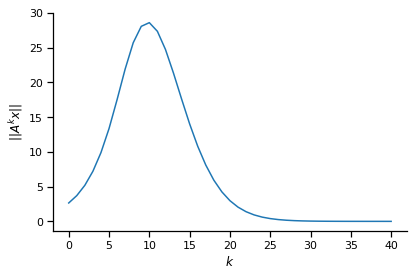

In [81]:
ks = np.arange(41)
norms = [norm(np.linalg.matrix_power(A, k)@x, 2) for k in ks]
print(norms)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(ks, norms)
ax.set_xlabel('$k$')
ax.set_ylabel('$\|\|A^k x\|\|$')
fig.tight_layout()
sns.despine(fig)

# Exercise 5 - Types of Errors

1. The goal of this exercise is to differentiate between the solution error $e$ (aka forward error) of an approximate solution to a linear system, and the residual error $r$ (aka backward error). I created vectors and matrices defining four different linear systems with approximate solutions below.

2. For each of the four linear systems and approximate solutions, I computed the residual as $r = \|Ax - b\|$.
3. For each of the four linear systems and approximate solutions, I computed the error as $e= \|y - t\|$.
4. For each case, I displayed the errors and residuals in the table below.

In [102]:
# case 1
A1 = np.array([
    [1, 1],
    [1, 1 - 1e-12]
])
b1 = np.array([0, 0])
x1 = np.array([1,-1])
t1 = np.array([0, 0])

# case 2
A2 = np.array([
    [1, 1],
    [1, 1 - 1e-12]
])
b2 = np.array([1, 1])
x2 = np.array([1.00001, 0])
t2 = np.array([1, 0])

# case 3
A3 = np.array([
    [1, 1],
    [1, 1 - 1e-12]
])
b3 = np.array([1, 1])
x3 = np.array([100, 100])
t3 = np.array([1, 0])

# case 4
A4 = np.array([
    [1e12, -1e12],
    [1, 1]
])
b4 = np.array([0, 2])
x4 = np.array([1.001, 1])
t4 = np.array([1, 1])

cases = [
    (A1, b1, x1, t1),
    (A2, b2, x2, t2),
    (A3, b3, x3, t3),
    (A4, b4, x4, t4)
]

# compute errors and residuals
data = []
for A, b, x, t in cases:
    r = norm(A@x - b)
    e = norm(x - t)
    data.append((r, e))

# create and show the results table
df = pd.DataFrame(
    data,
    columns=['residual', 'error'],
    index=range(1, len(cases)+1)
)
df.index.name = 'k'
df

,residual,error
k,,
1,9.999779e-13,1.414214
2,1.414214e-05,0.000010
3,2.814285e+02,140.716026
4,1.000000e+09,0.001000


Based on the table above, case 1 has a miniscule residual, but an error of 1.414. For case 2, the error and residual are both on the order of 1e-5. In case 3, the residual is twice as large as the error, but both are in the hundreds. Finally, in case 4, the residual is on the order of 1e9 but the error is just 1e-3. These four cases illustrate the range of possiblities for errors and residuals and the possible relations between them, which depend on the conditioning of the linear system.

# Exercise 6 - Relative error and sine BVP

For this exercise, we will consider the following boundary value problem:

$$
\begin{align}
    u''  &= -\frac{\pi^2}{100} \sin \left(\frac{\pi x}{10} \right) \\
    u(0) &= 0 \\
    u(5) &= 1
\end{align}
$$

Which has the exact solution:

$$
u = \sin \left( \frac{\pi x}{100} \right)
$$

- I copied the contents of the provided `rope_bvp` function into the cell below, but renamed it `sine_bvp`.
- I simplified the function signature by setting the default `n=11`.
- I changed the default values `uleft=0.0` and `uright=1.0`.
- Within the function body, I set the interval to $[0, 5]$.
- I altered the matrix entries according to the described instruction.

In [167]:
def sine_bvp(n=11, uleft=0.0, uright=1.0):
    x1 = 0.0
    x2 = 5.0
    x = np.linspace(x1, x2, n)
    dx = (x2 - x1) / (n - 1)

    A = np.zeros([n,n])
    b = np.zeros(n)

    # Equation 0: u0 = uleft
    A[0,0] = 1.0
    b[0] = uleft

    # Equation K: 
    for k in range(1, n-1):
        A[k,k-1] =  1 / dx**2
        A[k,k]   = -2 / dx**2
        A[k,k+1] =  1 / dx**2
        b[k]     = -(np.pi**2)/100 * np.sin(np.pi*x[k]/10)

    # Equation N-1: u(n-1) = uright
    A[n-1,n-1] = 1.0
    b[n-1] = uright

    u = np.linalg.solve(A, b)
    return x, u

def u_exact(x):
    return np.sin(np.pi*x/10)

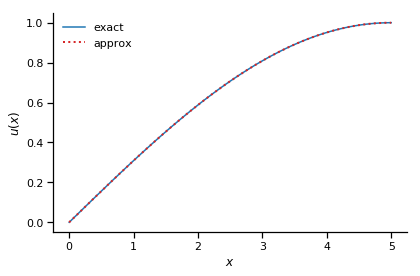

In [186]:
xn, un = sine_bvp(n=101)

xe = np.linspace(0.0, 5.0, 101)
ue = u_exact(xe)

colors = sns.color_palette()
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(xe, ue, label='exact', linestyle='-', color=colors[0])
ax.plot(xn, un, label='approx', linestyle=':', color=colors[3], linewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$u(x)$')
ax.legend(frameon=False)
fig.tight_layout()
sns.despine(fig)

#### 